# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Aziza | Ahsan | Aziza Ahsan, 11.11.2024 | 8 | 25 |
| Member 2: | Maggie | Somers | Maggie Somers, 11.11.2024 | 8 | 25 |
| Member 3: | Rasmita | Ghimire | Rasmita Ghimire, 11.11.2024 | 8 | 25 |
| Member 4: | Sanzida | Rahman | Sanzida Rahman, 11.11.2024 | 8 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

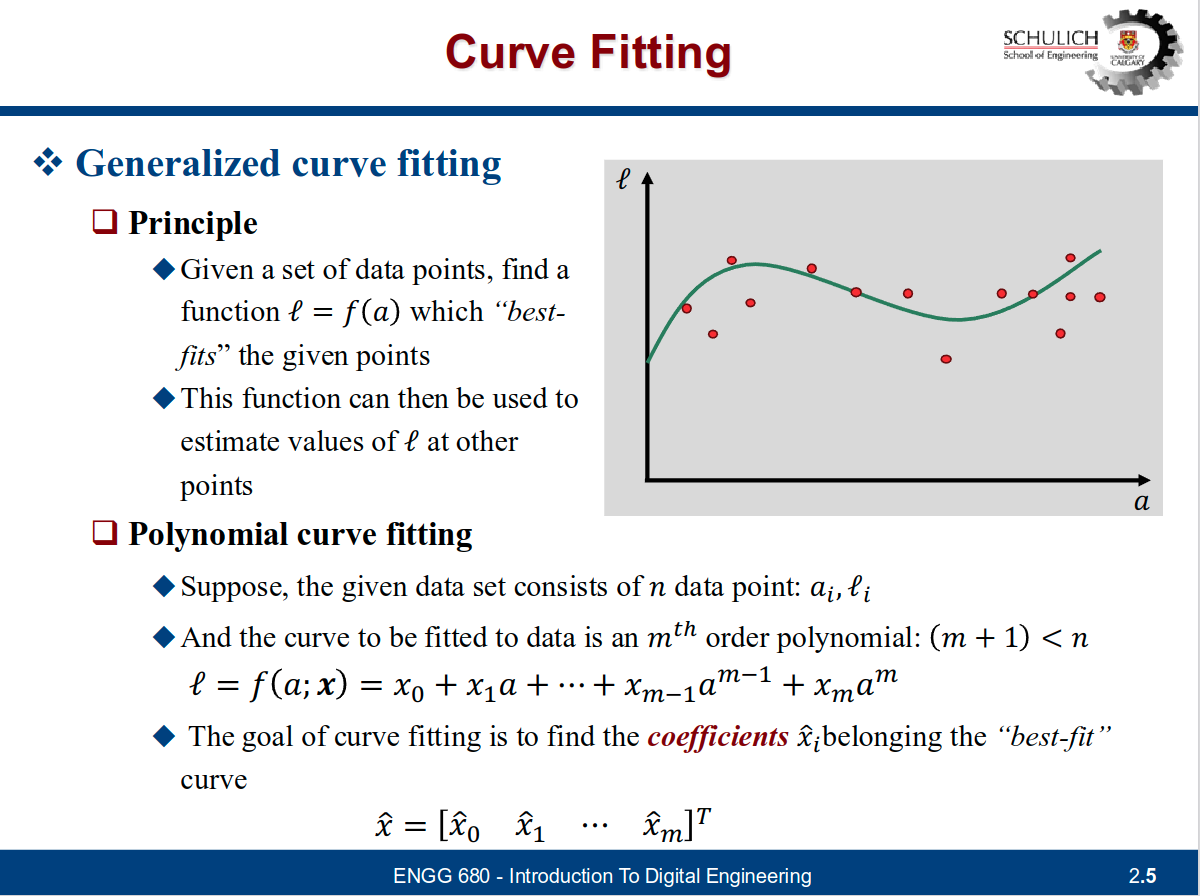

### **Observations:** values of a function f(a) in range of -Ï€ to Ï€, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel ('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [4]:
# step 3
# define the number of observation n
# (1 mark)
n = len(df_data)
#print("Number of observations (n):", n)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)
#print("Observation weight matrix (P):\n", P)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)
#print(a)

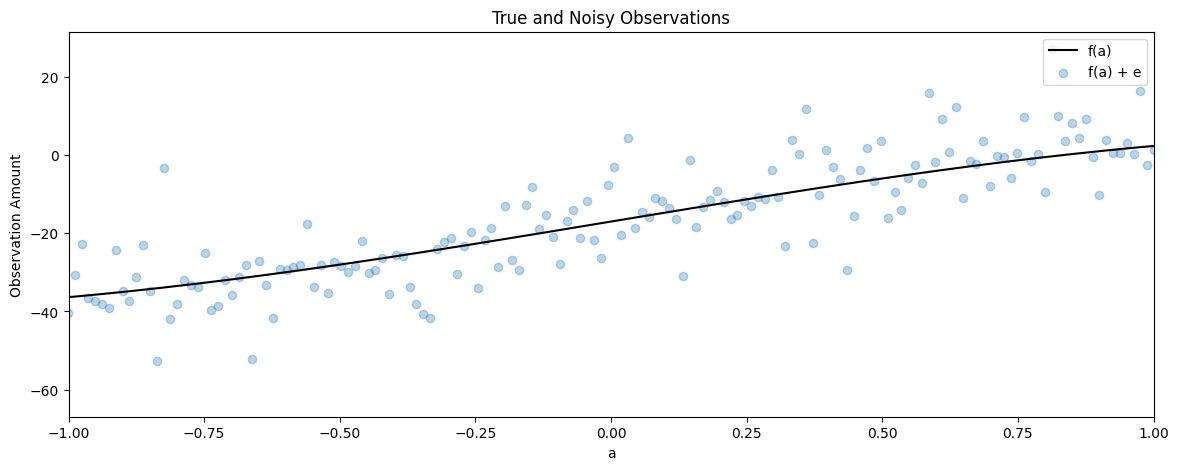

In [5]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

#plot the figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot true observations (label: "f(a)")
ax.plot(a, l_true[:n], label="f(a)", color='k')

# Scatter plot for noisy observations (label: "f(a) + e")
ax.scatter(a, l[:n], label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Step 4: Customize plot (axis labels, legend, title)
plt.xlabel('a')
plt.ylabel('Observation Amount')
plt.title('True and Noisy Observations')
plt.legend(loc='upper right')

# Set x-axis limits to -1 to 1
ax.set_xlim([-1, 1])

# Step 5: Display the plot
plt.show()

In [21]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Construct the design matrix for polynomial fitting
    A = np.vander(a, N=deg + 1, increasing=True)  # Vandermonde matrix

    # Solve for the polynomial coefficients (x) using Weighted Least Squares
    AT_P_A = A.T @ P @ A
    AT_P_l = A.T @ P @ l
    x = np.linalg.inv(AT_P_A) @ AT_P_l # Estimated polynomial coefficients

    # Calculate the fitted values and residuals
    l_fit = A @ x     # Predicted (fitted) values
    v = l - l_fit     # Residuals

    # Calculate the a posteriori variance factor (goodness of fit)
    dof = len(l) - (deg + 1)  # Degrees of freedom
    apv = (v.T @ P @ v) / dof  # A posteriori variance factor

    # Covariance matrix of the estimated coefficients
    cov_x = apv * np.linalg.inv(AT_P_A)  # Covariance of estimated parameters
    return x, cov_x, apv, v

In [25]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Call the function for polynomial degrees 1, 3, and 5
deg_1 = fit_polynomial_curve(a, l, P, 1)
deg_3 = fit_polynomial_curve(a, l, P, 3)
deg_5 = fit_polynomial_curve(a, l, P, 5)

In [28]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Extract coefficients for each degree
coeff_1 = deg_1[0]
coeff_3 = deg_3[0]
coeff_5 = deg_5[0]

# Evaluate the polynomial values using np.polyval
poly_deg_1 = np.polyval(coeff_1, a)
poly_deg_3 = np.polyval(coeff_3, a)
poly_deg_5 = np.polyval(coeff_5, a)

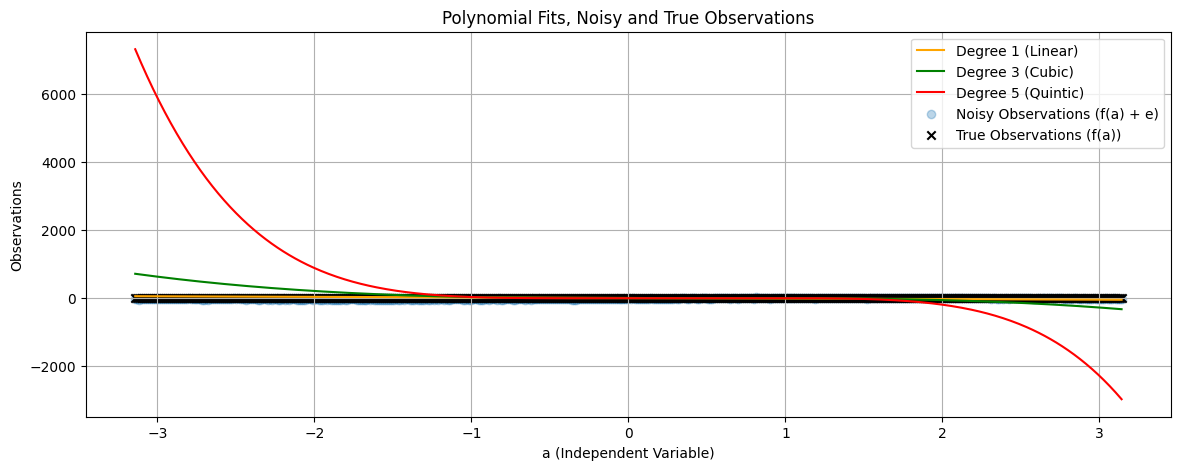

In [44]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot polynomial fits
plt.plot(a, poly_deg_1, label='Degree 1 (Linear)', color='orange')
plt.plot(a, poly_deg_3, label='Degree 3 (Cubic)', color='green')
plt.plot(a, poly_deg_5, label='Degree 5 (Quintic)', color='red')

# Plot noisy observations (scatter)
plt.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)

# Plot true observations
plt.scatter(a, l_true, label='True Observations (f(a))', color='k', marker='x')

# Customize the plot
plt.xlabel('a (Independent Variable)')
plt.ylabel('Observations')
plt.title('Polynomial Fits, Noisy and True Observations')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [31]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

apv_1 = deg_1[2]
apv_3 = deg_3[2]
apv_5 = deg_5[2]

print("A posteriori Variance Factor for Degree 1 (Linear):", apv_1)
print("A posteriori Variance Factor for Degree 3 (Cubic):", apv_3)
print("A posteriori Variance Factor for Degree 5 (Quintic):", apv_5)

A posteriori Variance Factor for Degree 1 (Linear): 162.742608604322
A posteriori Variance Factor for Degree 3 (Cubic): 66.13227783131883
A posteriori Variance Factor for Degree 5 (Quintic): 63.758344630184176


In [32]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
norm_deg_1 = np.linalg.norm(poly_deg_1 - l_true)
norm_deg_3 = np.linalg.norm(poly_deg_3 - l_true)
norm_deg_5 = np.linalg.norm(poly_deg_5 - l_true)

print("Norm for Degree 1 (Linear):", norm_deg_1)
print("Norm for Degree 3 (Cubic):", norm_deg_3)
print("Norm for Degree 5 (Quintic):", norm_deg_5)

Norm for Degree 1 (Linear): 692.7026097852402
Norm for Degree 3 (Cubic): 4803.092264658761
Norm for Degree 5 (Quintic): 38247.82538326066


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)


In [34]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

epsilon = 1e-10
weights = 1 / (l_var + epsilon)
P_matrix = np.diag(weights)
print("Observation weight matrix (P):\n", P_matrix)

Observation weight matrix (P):
 [[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


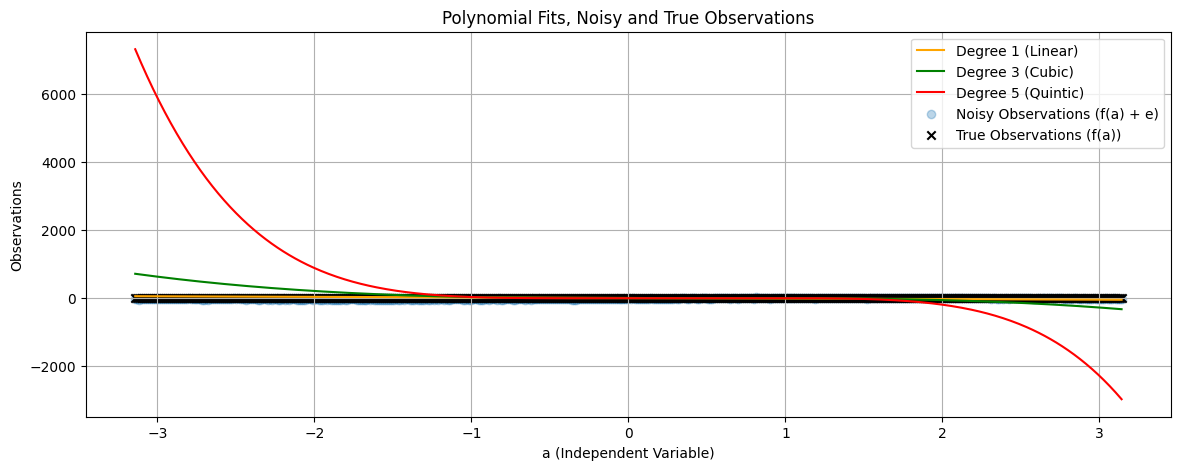

A posteriori Variance Factor for Degree 1 (Linear): 12.054651232744497
A posteriori Variance Factor for Degree 3 (Cubic): 1.1444647026349113
A posteriori Variance Factor for Degree 5 (Quintic): 0.9447009043775699
Norm for Degree 1 (Linear): 693.0629732587875
Norm for Degree 3 (Cubic): 4845.04543365241
Norm for Degree 5 (Quintic): 38610.01128951842


In [42]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# step 6
deg_1 = fit_polynomial_curve(a, l, P_matrix, 1)
deg_3 = fit_polynomial_curve(a, l, P_matrix, 3)
deg_5 = fit_polynomial_curve(a, l, P_matrix, 5)

# step 7
coeff_1 = deg_1[0]
coeff_3 = deg_3[0]
coeff_5 = deg_5[0]
poly_deg_1 = np.polyval(coeff_1, a)
poly_deg_3 = np.polyval(coeff_3, a)
poly_deg_5 = np.polyval(coeff_5, a)

# step 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plot polynomial fits
plt.plot(a, poly_deg_1, label='Degree 1 (Linear)', color='orange')
plt.plot(a, poly_deg_3, label='Degree 3 (Cubic)', color='green')
plt.plot(a, poly_deg_5, label='Degree 5 (Quintic)', color='red')
# Plot noisy observations (scatter)
plt.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)
# Plot true observations
plt.scatter(a, l_true, label='True Observations (f(a))', color='k', marker='x')
# Customize the plot
plt.xlabel('a (Independent Variable)')
plt.ylabel('Observations')
plt.title('Polynomial Fits, Noisy and True Observations')
plt.legend()
plt.grid(True)
# Show plot
plt.show()

# step 9
apv_1 = deg_1[2]
apv_3 = deg_3[2]
apv_5 = deg_5[2]

print("A posteriori Variance Factor for Degree 1 (Linear):", apv_1)
print("A posteriori Variance Factor for Degree 3 (Cubic):", apv_3)
print("A posteriori Variance Factor for Degree 5 (Quintic):", apv_5)

# step 10
norm_deg_1 = np.linalg.norm(poly_deg_1 - l_true)
norm_deg_3 = np.linalg.norm(poly_deg_3 - l_true)
norm_deg_5 = np.linalg.norm(poly_deg_5 - l_true)

print("Norm for Degree 1 (Linear):", norm_deg_1)
print("Norm for Degree 3 (Cubic):", norm_deg_3)
print("Norm for Degree 5 (Quintic):", norm_deg_5)

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

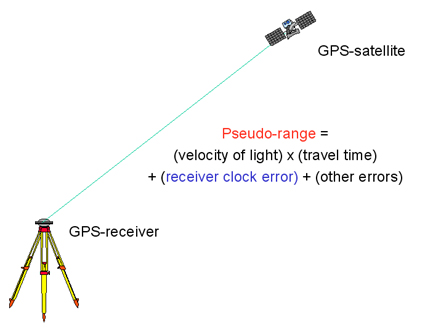

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+Ïµ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$Ïµ_{sum}=general\ errors\ term\ (Ïµ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

# Define the number of measurements n
n = pseudorange.shape[0]
print("Number of Measurements (n):", n)

# Number of columns in the second array excluding 'satellite position'
m = sat_pos.shape[1] - 1
print("Number of States (m):", m)

Number of Measurements (n): 11
Number of States (m): 3


In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# Given that variance of observation is 1 (m^2)
variance = 1.0

# Define the weight matrix P
P = np.full((n, m), variance)
print("Weight Matrix (P):\n", P)


Weight Matrix (P):
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print("Initial States (x_0):\n", x_0)

Initial States (x_0):
 [0. 0. 0.]


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  distance = np.sqrt(np.sum((receiver_pos - satellite_pos)**2, axis=1))
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  A = np.zeros((n, m))
  for i in range(n):
    for j in range(m):
      A[i, j] = (r_pos[j] - s_pos[i, j]) / rho[i]
      A[i, j] = 1 / rho[i]
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
convergence_criteria = 0.001
if np.all(delta < 0.1):
  convergence = True
else:
  convergence = False

#while (convergence_criteria)


       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:, 1:])
       print("Geometric Distances (rho):\n", rho)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], sat_pos[:, 1:], rho)
       print("Design Matrix (A):\n", A)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange[:, 0] - rho - x_hat[3]
       print("Misclosure Array (w):\n", w)

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)
       print("Corrections Array (delta):\n", delta)

       # update the states
       # (1 marks)
       x_hat = x_hat + delta
       print("Updated States (x_hat):\n", x_hat)


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = x_hat[:3] - GroundTruth
       print("Position Error (err_pos):\n", err_pos)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1
       print("Iteration Counter (i):\n", i)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = np.linalg.inv(A.T @ P @ A)
print("A Posteriori Variance of Unit Weight (APV):\n", apv)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ P @ A) @ (A.T @ P)
print("Covariance Matrix of Estimated States (C_x_hat):\n", C_x_hat)




IndentationError: unexpected indent (<ipython-input-13-2c1c7ab337b1>, line 18)

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
